### **GRIP - THE SPARKS FOUNDATION**

####Data Science and Buisness Analytics Internship


---


#####Task 1:: Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.



---


###Author:: Jigar Bhatt

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


%matplotlib inline

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

student_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Dimension of data
student_data.shape

(25, 2)

In [ ]:
#statistics of data
student_data.describe()

#student_data.info()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# checking for any missing values
student_data.isnull().sum()

print("NO Missing values found")

NO Missing values found


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


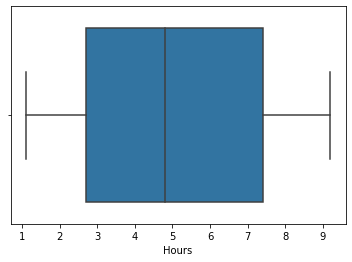

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


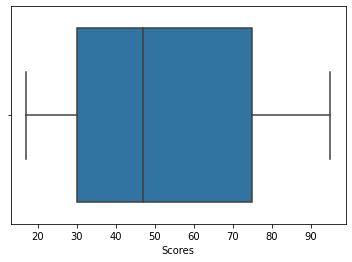

In [ ]:
# representing no missing values
for i in student_data.columns:
    sns.boxplot(student_data[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


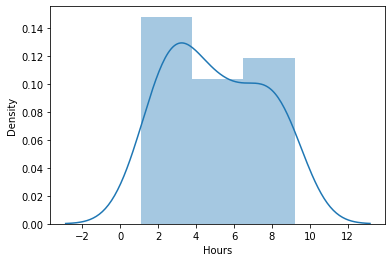

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


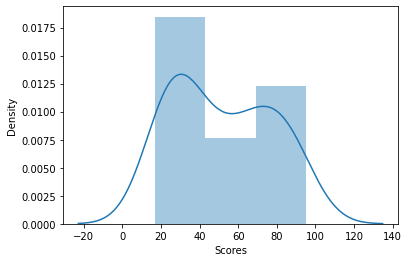

In [ ]:
#Outliers
for i in student_data.columns:
    sns.distplot(student_data[i])
    plt.show()

In [ ]:
# corelation between hours and scores
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Two variables are highly corelated 



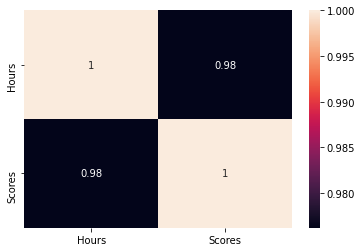

In [ ]:
sns.heatmap(student_data.corr(),annot=True)

print("Two variables are highly corelated \n")

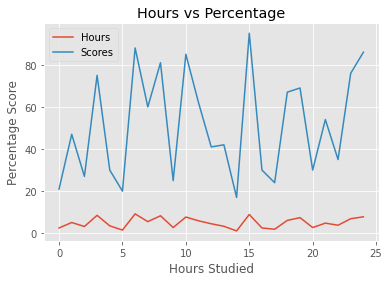

In [ ]:
#line plot
plt.style.use('ggplot')
student_data.plot(kind="line")
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")
plt.show()

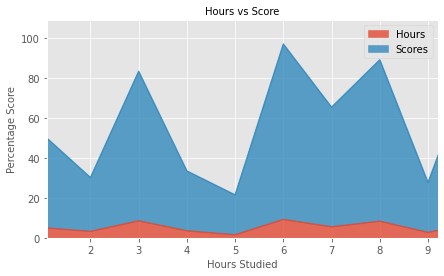

In [ ]:
#area plot
xmin = min(student_data.Hours)
xmax = max(student_data.Hours)
student_data.plot(kind='area', alpha = 0.8, stacked= True, figsize=(7,4), xlim=(xmin,xmax))
plt.title("Hours vs Score",size=10)
plt.xlabel('Hours Studied',size=10)
plt.ylabel("Percentage Score",size=10)
plt.show()

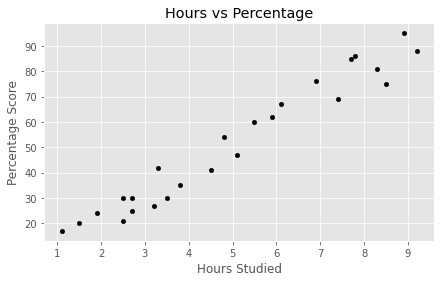

In [ ]:
#scatter plot
student_data.plot(kind='scatter', x='Hours', y='Scores', color = 'k', figsize=(7,4))
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")
plt.show()

*Various visualizations defines that both variables are highly corelated and can easily solved by linear regression problem.*

---




Training completed

Coefficients:  [9.91065648]
Intercept:  2.018160041434662


Best fit line.....



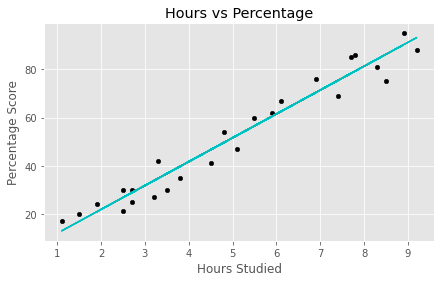

In [ ]:
#Training the model
X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print("Training completed\n")
print("Coefficients: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

print("\n")

print("Best fit line.....\n")

#Fitting linear regression line on scatter plot
student_data.plot(kind='scatter', x='Hours', y='Scores', color = 'k', figsize=(7,4))
plt.plot(X_train, regressor.coef_[0]*X_train + regressor.intercept_, color="c", )
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")
plt.show()

In [ ]:
#Predicting the percentage of marks
Y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_pred]})
print(prediction)

   Hours  Predicted Marks
0    1.5        16.884145
1    3.2        33.732261
2    7.4        75.357018
3    2.5        26.794801
4    5.9        60.491033


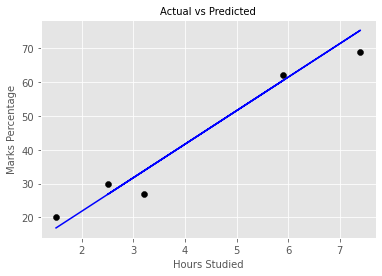

In [ ]:
#Predicted Marks vs the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': Y_pred})
compare_scores

plt.scatter(x=X_test, y=Y_test, color='k')
plt.plot(X_test, Y_pred, color='b')
plt.title('Actual vs Predicted', size=10)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

In [ ]:
# Evaluating the Model
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_test,Y_pred))
print("\n")
print("R2-score: ", r2_score(Y_pred, Y_test))

Mean absolute error:  4.183859899002982


R2-score:  0.9546785947197246


In [ ]:
# Predicting the percentage score with single value

hours = 9.25
predicted_score = regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'Predicted Score = {predicted_score[0]}')

No. of hours = 9.25
Predicted Score = 93.69173248737539
